## Análise Exploratória

### Importando pacotes necessários e Extraindo conjunto de dados

In [1]:
#@title
import numpy as np # linear algebra
import pandas as pd # data processing / manipulation

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor

# métricas
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import  sklearn.metrics  as  metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Data Visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
workdir_path = '/content/drive/MyDrive/datasets'
os.chdir(workdir_path)
!ls

AP_cap.png  AP_drop.png  boxplot_origin.png  csinascrj19.csv  sinascrj19.csv


In [4]:
sinasc = pd.read_csv('sinascrj19.csv')
print(sinasc.shape)

(207989, 61)


In [5]:
sinasc_df = sinasc.assign(GPESO=1)

In [6]:
sinasc_df.loc[(sinasc_df['PESO'] > 0000) & (sinasc_df['PESO'] < 1000), 'GPESO'] = 1
sinasc_df.loc[(sinasc_df['PESO'] > 1000) & (sinasc_df['PESO'] < 2000), 'GPESO'] = 2
sinasc_df.loc[(sinasc_df['PESO'] > 2000) & (sinasc_df['PESO'] < 3000), 'GPESO'] = 3
sinasc_df.loc[(sinasc_df['PESO'] > 3000) & (sinasc_df['PESO'] < 4000), 'GPESO'] = 4
sinasc_df.loc[(sinasc_df['PESO'] > 4000) & (sinasc_df['PESO'] < 7000), 'GPESO'] = 5

In [8]:
sinasc_df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,GPESO
0,1,2365146.0,220390,1,26,1.0,3.0,NaN,1.0,2.0,330455,5.0,1.0,1.0,4,19052019,2131.0,2,10.0,10.0,4.0,3790.0,2.0,27052019,NaN,20190028,3.2.01,10062019,22,NaN,833.0,330455.0,33.0,1.0,4.0,19121992.0,4.0,3.0,1.0,0.0,NaN,5082018.0,41.0,8.0,7.0,1.0,1.0,2.0,3.0,2.0,NaN,4.0,19052019.0,2.0,0,1,1,3,1,5,215113,4
1,1,2727064.0,221100,1,29,5.0,4.0,521110.0,0.0,0.0,330455,4.0,1.0,1.0,4,16032019,1840.0,1,9.0,10.0,4.0,3020.0,2.0,26032019,NaN,20190007,3.2.01,2042019,17,NaN,822.0,221100.0,22.0,3.0,NaN,15031990.0,4.0,0.0,0.0,0.0,NaN,5072018.0,36.0,8.0,8.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0,16032019.0,12.0,0,1,1,10,0,5,232260,4
2,1,2561344.0,230500,1,27,5.0,3.0,999993.0,4.0,0.0,330455,5.0,1.0,1.0,4,5022019,2345.0,2,2.0,9.0,4.0,2445.0,2.0,20032019,NaN,20190006,3.2.00,21032019,44,NaN,823.0,230500.0,23.0,2.0,7.0,18021991.0,4.0,4.0,3.0,1.0,NaN,12052018.0,38.0,8.0,9.0,2.0,2.0,1.0,3.0,1.0,2.0,3.0,5022019.0,3.0,0,1,1,7,1,5,275403,3
3,1,2473577.0,240710,1,18,5.0,4.0,622020.0,NaN,NaN,330455,5.0,1.0,2.0,4,19022019,2026.0,2,4.0,6.0,4.0,3760.0,2.0,26022019,NaN,20190025,3.2.01,27022019,8,NaN,833.0,330455.0,33.0,3.0,2.0,15012001.0,4.0,0.0,NaN,NaN,NaN,8052018.0,40.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20022019.0,5.0,0,1,1,2,0,5,306210,4
4,1,2654032.0,240810,1,30,2.0,4.0,351305.0,0.0,0.0,330490,5.0,1.0,2.0,4,26022019,2249.0,2,8.0,9.0,4.0,2880.0,2.0,9042019,NaN,20190012,3.2.01,29042019,62,NaN,825.0,250000.0,25.0,3.0,NaN,11091988.0,4.0,0.0,0.0,0.0,47.0,NaN,39.0,1.0,10.0,2.0,1.0,2.0,1.0,1.0,2.0,5.0,28022019.0,12.0,0,1,1,2,0,5,312841,3


In [9]:
sinasc_df.tail()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,GPESO
207984,1,2491710.0,421870,1,32,2.0,5.0,252105.0,0.0,0.0,330455,5.0,1.0,2.0,4,18112019,1033.0,1,9.0,10.0,1.0,3505.0,2.0,18122019,NaN,20190046,3.2.02,20122019,32,NaN,842.0,421870.0,42.0,5.0,NaN,5081987.0,1.0,0.0,0.0,0.0,NaN,16022019.0,39.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,19112019.0,8.0,0,1,1,2,0,5,2667845,4
207985,1,2237598.0,431490,1,25,2.0,5.0,999991.0,1.0,0.0,330455,5.0,1.0,2.0,3,16092019,1132.0,1,8.0,8.0,1.0,2965.0,2.0,29062020,NaN,20200003,3.2.00,29062020,287,NaN,843.0,430460.0,43.0,4.0,NaN,7061994.0,1.0,1.0,0.0,1.0,35.0,16122018.0,39.0,8.0,5.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,16092019.0,7.0,0,1,1,5,1,3,2671496,3
207986,1,2232995.0,431560,1,32,NaN,5.0,239415.0,0.0,0.0,330455,5.0,1.0,2.0,4,23102019,2045.0,1,8.0,8.0,NaN,3165.0,2.0,4112019,NaN,20190031,3.2.00,8112019,16,NaN,NaN,NaN,NaN,5.0,NaN,5071987.0,NaN,0.0,0.0,0.0,NaN,14012019.0,40.0,8.0,9.0,4.0,1.0,2.0,1.0,1.0,2.0,3.0,24102019.0,8.0,0,1,1,2,0,2,2714893,4
207987,1,2311682.0,510340,1,28,5.0,4.0,262105.0,1.0,1.0,330455,4.0,1.0,2.0,4,28092019,730.0,2,9.0,9.0,4.0,2590.0,2.0,5112019,NaN,20190037,3.2.01,18112019,51,NaN,851.0,510480.0,51.0,3.0,3.0,12031991.0,4.0,2.0,0.0,1.0,NaN,NaN,36.0,2.0,12.0,1.0,1.0,2.0,2.0,1.0,5.0,5.0,28092019.0,6.0,0,1,1,10,1,5,2763245,3
207988,1,2815966.0,530010,1,45,5.0,5.0,223505.0,0.0,0.0,330455,5.0,1.0,2.0,4,2122019,2021.0,2,9.0,9.0,1.0,3360.0,2.0,29012020,NaN,20200007,3.2.01,31012020,60,NaN,853.0,530010.0,53.0,5.0,NaN,19021974.0,1.0,0.0,0.0,0.0,38.0,NaN,38.0,1.0,8.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2122019.0,8.0,0,1,1,2,0,5,2845594,4


In [10]:
print(sinasc_df.columns)
print('-----------------------------------------------------------------------------')
print(sinasc_df.dtypes)
print('-----------------------------------------------------------------------------')
print(sinasc_df.dtypes.value_counts())
print('-----------------------------------------------------------------------------')

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'GPESO'],
      dtype='object')
-----------------------------------------------------------------------------
ORIGEM          int64
CODESTA

In [11]:
sinasc_df.index

RangeIndex(start=0, stop=207989, step=1)

In [12]:
sinasc_df.describe()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,NUMEROLOTE,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,GPESO
count,207989.0,2.067690e+05,207989.000000,207989.000000,207989.000000,207065.000000,207336.00000,180992.000000,205826.000000,204300.000000,207989.000000,205678.000000,207871.000000,207867.000000,207989.000000,2.079890e+05,207857.000000,207989.000000,206220.000000,206351.000000,204576.000000,207984.000000,207671.000000,2.079890e+05,2.079890e+05,2.079890e+05,207989.000000,0.0,207027.000000,207027.000000,207027.000000,207333.000000,116188.000000,2.077450e+05,204574.000000,206723.000000,205326.000000,204995.000000,98282.000000,6.366000e+04,205678.000000,205678.000000,205835.000000,206321.000000,207543.000000,207481.000000,206351.000000,207809.000000,200081.000000,207987.000000,2.066200e+05,207333.000000,207989.0,207989.0,207989.0,207989.000000,207989.000000,207989.000000,2.079890e+05,207989.000000
mean,1.0,4.027585e+06,330346.123593,1.015861,27.317671,1.527786,4.10427,777573.788935,0.956944,0.248551,330357.675507,4.882462,1.024034,1.578197,3.716870,1.574990e+07,1326.550273,1.489646,8.877442,9.483521,2.710342,3169.207516,2.140776,1.581556e+07,2.019135e+07,1.610467e+07,60.201482,NaN,832.363001,324041.319712,32.363001,3.180102,3.907908,1.577952e+07,2.710344,1.185204,0.598015,0.396956,32.011681,1.551430e+07,38.415747,3.943193,9.430928,8.852245,1.148162,2.120469,2.427732,1.091858,2.868518,3.258704,1.580242e+07,6.928058,0.0,1.0,1.0,4.104558,0.614085,4.553274,1.469995e+06,3.660280
std,0.0,2.200514e+06,1651.658504,0.200973,6.852959,0.952354,0.89891,305652.823665,1.279743,0.764043,157.323605,0.438519,0.171079,0.500621,0.887018,8.751966e+06,614.432099,0.500355,6.976617,5.423540,1.391103,574.538164,1.009936,8.594583e+06,3.341734e+03,8.265186e+06,92.914739,NaN,2.927034,29277.419457,2.927034,1.244938,2.299303,8.764944e+06,1.391101,1.488054,1.280457,0.905240,7.973018,8.638337e+06,2.167573,3.402715,10.542201,24.071156,0.959431,1.402609,1.637811,0.406659,1.544800,1.047351,8.758185e+06,2.972985,0.0,0.0,0.0,2.746622,0.486812,1.703556,7.168731e+05,0.683626
min,1.0,2.000000e+01,110020.000000,1.000000,10.000000,1.000000,1.00000,10205.000000,0.000000,0.000000,330000.000000,1.000000,1.000000,1.000000,1.000000,1.012019e+06,0.000000,0.000000,0.000000,0.000000,1.000000,100.000000,1.000000,1.022019e+06,2.019000e+07,1.022019e+06,1.000000,NaN,811.000000,110000.000000,11.000000,0.000000,1.000000,1.011974e+06,1.000000,0.000000,0.000000,0.000000,9.000000,1.012019e+06,19.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.012019e+06,0.000000,0.0,1.0,1.0,1.000000,0.000000,1.000000,2.151130e+05,1.000000
25%,1.0,2.280248e+06,330285.000000,1.000000,22.000000,1.000000,4.00000,512105.000000,0.000000,0.000000,330240.000000,5.000000,1.000000,1.000000,3.000000,8.082019e+06,918.000000,1.000000,8.000000,9.000000,1.000000,2885.000000,2.000000,9.012020e+06,2.019004e+07,9.052019e+06,16.000000,NaN,833.000000,330040.000000,33.000000,2.000000,2.000000,8.081995e+06,1.000000,0.000000,0.000000,0.000000,26.000000,8.052018e+06,38.000000,1.000000,6.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,8.082019e+06,5.000000,0.0,1.0,1.0,2.000000,0.000000,4.000000,7.870350e+05,3.000000
50%,1.0,2.704390e+06,330455.000000,1.000000,27.000000,1.000000,4.00000,999992.000000,1.000000,0.000000,330455.000000,5.000000,1.000000,2.000000,4.000000,1.603202e+07,1341.000000,1.000000,9.000000,9.000000,4.000000,3205.000000,2.000000,1.510202e+07,2.019006e+07,1.608202e+07,27.000000,Na

In [13]:
sinasc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207989 entries, 0 to 207988
Data columns (total 62 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ORIGEM      207989 non-null  int64  
 1   CODESTAB    206769 non-null  float64
 2   CODMUNNASC  207989 non-null  int64  
 3   LOCNASC     207989 non-null  int64  
 4   IDADEMAE    207989 non-null  int64  
 5   ESTCIVMAE   207065 non-null  float64
 6   ESCMAE      207336 non-null  float64
 7   CODOCUPMAE  180992 non-null  float64
 8   QTDFILVIVO  205826 non-null  float64
 9   QTDFILMORT  204300 non-null  float64
 10  CODMUNRES   207989 non-null  int64  
 11  GESTACAO    205678 non-null  float64
 12  GRAVIDEZ    207871 non-null  float64
 13  PARTO       207867 non-null  float64
 14  CONSULTAS   207989 non-null  int64  
 15  DTNASC      207989 non-null  int64  
 16  HORANASC    207857 non-null  float64
 17  SEXO        207989 non-null  int64  
 18  APGAR1      206220 non-null  float64
 19  AP

In [14]:
# Exclusão de variáveis sem nulas ou sem relação com o objeto
sinasc_df = sinasc_df.drop(columns=['ORIGEM', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPNASCASSI',
                                  'DTCADASTRO', 'CODMUNNASC'], axis=1)

## Análise Visual Geral

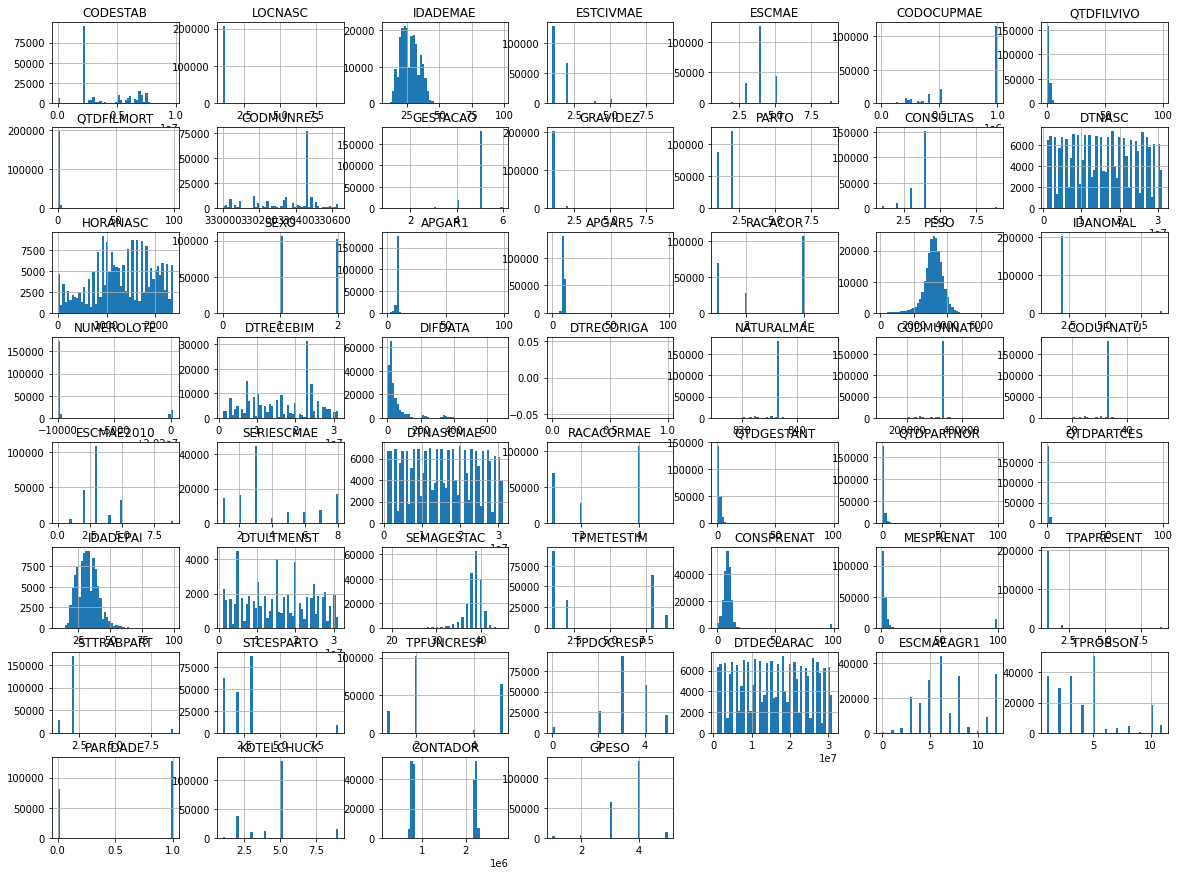

In [15]:
sinasc_df.hist(bins=50, figsize=(20,15))
plt.show()

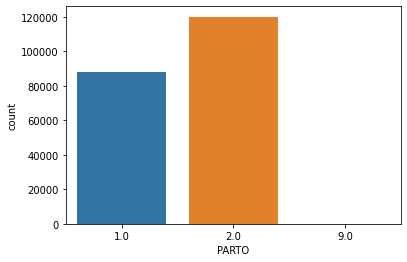

In [16]:
sns.countplot(data=sinasc_df, x='PARTO');

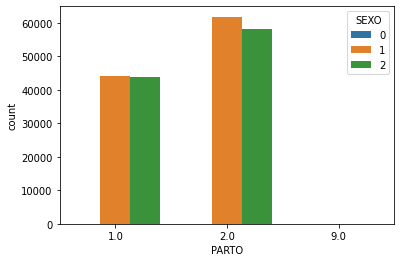

In [17]:
sns.countplot(data=sinasc_df, x='PARTO', hue='SEXO');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff09d5f0250>,
      dtype=object)

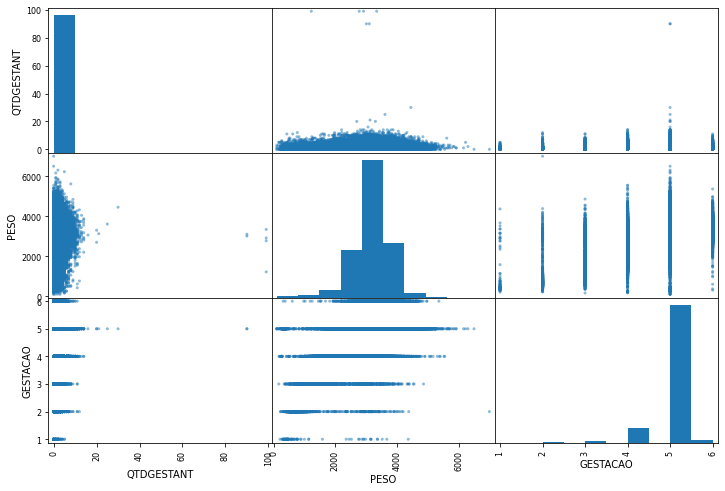

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["QTDGESTANT","PESO", "GESTACAO" ]
scatter_matrix(sinasc_df[attributes], figsize=(12, 8))

### Análise da variável PESO

In [19]:
sinasc_df.PESO.mean()

3169.2075159627666

In [20]:
colunas = ["IDADEMAE","PESO"]
sinasc_df[colunas].describe()

,IDADEMAE,PESO
count,207989.000000,207984.000000
mean,27.317671,3169.207516
std,6.852959,574.538164
min,10.000000,100.000000
25%,22.000000,2885.000000
50%,27.000000,3205.000000
75%,32.000000,3520.000000
max,99.000000,7000.000000


In [21]:
idade_max = sinasc_df.IDADEMAE.max()
idade_min = sinasc_df.IDADEMAE.min()

peso_max = sinasc_df.PESO.max()
peso_min = sinasc_df.PESO.min()

In [22]:
sinasc_df[(sinasc_df.PESO == peso_max) | (sinasc_df.PESO == peso_min)]

,CODESTAB,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,GPESO
25375,7591136.0,1,19,1.0,4.0,999992.0,0.0,0.0,330045,2.0,1.0,2.0,2,23062019,1302.0,2,4.0,6.0,4.0,7000.0,2.0,NaN,20190030,3.2.01,9082019,47,NaN,833.0,330350.0,33.0,3.0,2.0,14052000.0,4.0,0.0,0.0,0.0,NaN,NaN,26.0,1.0,3.0,4.0,1.0,2.0,1.0,5.0,4.0,23062019.0,5.0,10,0,2,760319,1
101877,2280248.0,1,25,1.0,3.0,999992.0,2.0,1.0,330455,5.0,1.0,2.0,2,10062019,813.0,2,9.0,9.0,1.0,100.0,2.0,NaN,20190117,3.2.01,3072019,23,NaN,833.0,330000.0,33.0,2.0,5.0,10031994.0,1.0,3.0,0.0,2.0,NaN,NaN,39.0,9.0,3.0,99.0,1.0,2.0,2.0,1.0,2.0,10062019.0,3.0,5,1,9,836995,1
105433,7041624.0,1,14,1.0,3.0,999991.0,0.0,0.0,330455,5.0,1.0,1.0,4,12062019,1940.0,2,9.0,10.0,4.0,100.0,2.0,NaN,20190136,3.2.01,7082019,56,NaN,833.0,330455.0,33.0,2.0,NaN,26082004.0,4.0,0.0,0.0,0.0,NaN,NaN,39.0,1.0,8.0,1.0,1.0,2.0,3.0,5.0,5.0,14062019.0,11.0,1,0,5,840558,1
173021,2298120.0,1,18,1.0,4.0,999992.0,0.0,1.0,330455,5.0,1.0,2.0,4,10072019,2115.0,2,NaN,NaN,4.0,100.0,NaN,NaN,20190154,3.2.01,23082019,44,NaN,833.0,330170.0,33.0,3.0,1.0,15012001.0,4.0,1.0,0.0,0.0,NaN,NaN,41.0,1.0,8.0,2.0,1.0,1.0,2.0,2.0,3.0,11072019.0,5.0,4,1,5,2238321,1
205321,6518893.0,1,16,1.0,3.0,999992.0,0.0,0.0,330045,5.0,1.0,1.0,4,9082019,2356.0,1,6.0,8.0,1.0,100.0,2.0,NaN,20190036,3.2.01,26082019,17,NaN,833.0,330045.0,33.0,2.0,7.0,3022003.0,1.0,0.0,0.0,0.0,NaN,NaN,40.0,2.0,7.0,4.0,1.0,2.0,3.0,2.0,3.0,10082019.0,3.0,1,0,2,2270641,1


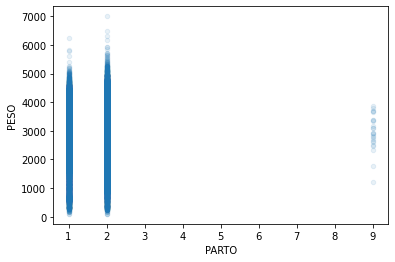

In [23]:
sinasc_df.plot(kind="scatter", x="PARTO", y="PESO", alpha=.1)

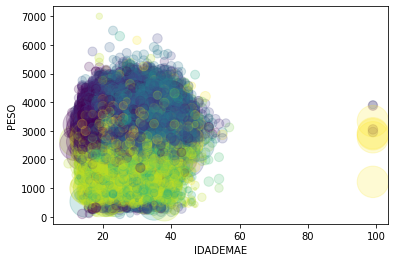

In [24]:
plt.scatter(sinasc_df["IDADEMAE"],sinasc_df["PESO"], alpha=0.2,
s=10*sinasc_df["APGAR1"], c=sinasc_df.TPROBSON, cmap='viridis')
plt.xlabel("IDADEMAE")
plt.ylabel("PESO");

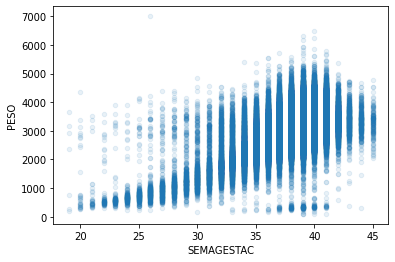

In [25]:
sinasc_df.plot(kind="scatter", x="SEMAGESTAC", y="PESO", alpha=.1)

## Pré-processamento

### Tratamento de Missing Values

In [26]:
cat_null = sinasc_df.isnull().sum()
print(cat_null)

cat_null = cat_null/len(sinasc_df)*100
cat_null = cat_null[cat_null>0]
cat_null.sort_values(inplace=True, ascending=False)
cat_null

CODESTAB        1220
LOCNASC            0
IDADEMAE           0
ESTCIVMAE        924
ESCMAE           653
CODOCUPMAE     26997
QTDFILVIVO      2163
QTDFILMORT      3689
CODMUNRES          0
GESTACAO        2311
GRAVIDEZ         118
PARTO            122
CONSULTAS          0
DTNASC             0
HORANASC         132
SEXO               0
APGAR1          1769
APGAR5          1638
RACACOR         3413
PESO               5
IDANOMAL         318
CODANOMAL     206582
NUMEROLOTE         0
VERSAOSIST         0
DTRECEBIM          0
DIFDATA            0
DTRECORIGA    207989
NATURALMAE       962
CODMUNNATU       962
CODUFNATU        962
ESCMAE2010       656
SERIESCMAE     91801
DTNASCMAE        244
RACACORMAE      3415
QTDGESTANT      1266
QTDPARTNOR      2663
QTDPARTCES      2994
IDADEPAI      109707
DTULTMENST    144329
SEMAGESTAC      2311
TPMETESTIM      2311
CONSPRENAT      2154
MESPRENAT       1668
TPAPRESENT       446
STTRABPART       508
STCESPARTO      1638
TPFUNCRESP      7908
TPDOCRESP    

DTRECORIGA    100.000000
CODANOMAL      99.323522
DTULTMENST     69.392612
IDADEPAI       52.746539
SERIESCMAE     44.137430
CODOCUPMAE     12.980013
TPFUNCRESP      3.802124
QTDFILMORT      1.773651
RACACORMAE      1.641914
RACACOR         1.640952
QTDPARTCES      1.439499
QTDPARTNOR      1.280356
TPMETESTIM      1.111116
SEMAGESTAC      1.111116
GESTACAO        1.111116
QTDFILVIVO      1.039959
CONSPRENAT      1.035632
APGAR1          0.850526
MESPRENAT       0.801965
APGAR5          0.787542
STCESPARTO      0.787542
DTDECLARAC      0.658208
QTDGESTANT      0.608686
CODESTAB        0.586569
CODUFNATU       0.462524
NATURALMAE      0.462524
CODMUNNATU      0.462524
ESTCIVMAE       0.444254
ESCMAE2010      0.315401
ESCMAEAGR1      0.315401
ESCMAE          0.313959
STTRABPART      0.244244
TPAPRESENT      0.214434
IDANOMAL        0.152893
DTNASCMAE       0.117314
HORANASC        0.063465
PARTO           0.058657
GRAVIDEZ        0.056734
PESO            0.002404
TPDOCRESP       0.000962


([<matplotlib.axis.XTick at 0x7ff0a08f9a10>,
 [Text(0, 0, 'CODESTAB'),
  Text(0, 0, 'LOCNASC'),
  Text(0, 0, 'IDADEMAE'),
  Text(0, 0, 'ESTCIVMAE'),
  Text(0, 0, 'ESCMAE'),
  Text(0, 0, 'CODOCUPMAE'),
  Text(0, 0, 'QTDFILVIVO'),
  Text(0, 0, 'QTDFILMORT'),
  Text(0, 0, 'CODMUNRES'),
  Text(0, 0, 'GESTACAO'),
  Text(0, 0, 'GRAVIDEZ'),
  Text(0, 0, 'PARTO'),
  Text(0, 0, 'CONSULTAS'),
  Text(0, 0, 'DTNASC'),
  Text(0, 0, 'HORANASC'),
  Text(0, 0, 'SEXO'),
  Text(0, 0, 'APGAR1'),
  Text(0, 0, 'APGAR5'),
  Text(0, 0, 'RACACOR'),
  Text(0, 0, 'PESO'),
  Text(0, 0, 'IDANOMAL'),
  Text(0, 0, 'CODANOMAL'),
  Text(0, 0, 'NUMEROLOTE'),
  Text(0, 0, 'VERSAOSIST'),
  Text(0, 0, 'DTRECEBIM'),
  Text(0, 0, 'DIFDATA'),
  Text(0, 0, 'DTRECORIGA'),
  Text(0, 0, 'NATURALMAE'),
  Text(0, 0, 'CODMUNNATU'),
  Text(0, 0, 'CODUFNATU'),
  Text(0, 0, 'ESCMAE2010'),
  Text(0, 0, 'SERIESCMAE'),
  Text(0, 0, 'DTNASCMAE'),
  Text(0, 0, 'RACACORMAE'),
  Text(0, 0, 'QTDGESTANT'),
  Text(0, 0, 'QTDPARTNOR'),
  Text(0

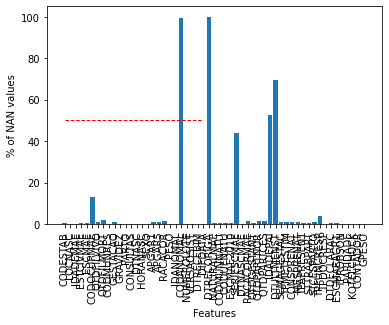

In [27]:
null_cat=sinasc_df.isna().sum()/len(sinasc_df)*100
plt.bar(range(len(null_cat)),null_cat)
plt.xlabel('Features')
plt.ylabel('% of NAN values')
plt.plot([0, 25], [50,50], 'r--', lw=1)
plt.xticks(list(range(len(sinasc_df.columns))),list(sinasc_df.columns.values),rotation='vertical')

In [28]:
for col in sinasc_df.columns.values:
    if (pd.isna(sinasc_df[col]).sum()) > 0: 
        if pd.isna(sinasc_df[col]).sum() > (45/100 * len(sinasc_df)): 
            print(col,"removido") 
            sinasc_df = sinasc_df.drop([col], axis=1) 
        elif (sinasc_df[col].dtype == 'object'):
            sinasc_df[col] = sinasc_df[col].fillna(sinasc_df[col].mode()[0])        
        else: sinasc_df[col] = sinasc_df[col].fillna(sinasc_df[col].median())

CODANOMAL removido
DTRECORIGA removido
SERIESCMAE removido
IDADEPAI removido
DTULTMENST removido


### Analise de Correlação

Correlação das features numéricas com o resultado em ordem crescente
PESO          1.000000
GPESO         0.837239
SEMAGESTAC    0.553945
GESTACAO      0.488692
TPROBSON      0.306208
GRAVIDEZ      0.219216
SEXO          0.102351
CONSULTAS     0.093653
PARIDADE      0.081205
QTDFILVIVO    0.050330
KOTELCHUCK    0.042783
QTDPARTCES    0.041418
TPAPRESENT    0.038593
QTDGESTANT    0.035847
MESPRENAT     0.032822
LOCNASC       0.027520
CODMUNNATU    0.025940
CODUFNATU     0.025928
NATURALMAE    0.025928
CONSPRENAT    0.022653
IDADEMAE      0.022203
QTDPARTNOR    0.018470
QTDFILMORT    0.017484
STTRABPART    0.016339
TPDOCRESP     0.015411
CODESTAB      0.012250
TPMETESTIM    0.010556
PARTO         0.010287
IDANOMAL      0.009578
CONTADOR      0.009200
CODMUNRES     0.008337
RACACORMAE    0.007974
RACACOR       0.007972
ESCMAE        0.007872
ESTCIVMAE     0.007499
DTDECLARAC    0.004175
HORANASC      0.003802
NUMEROLOTE    0.003661
ESCMAE2010    0.003535
DTNASC        0.003534
APGAR1     

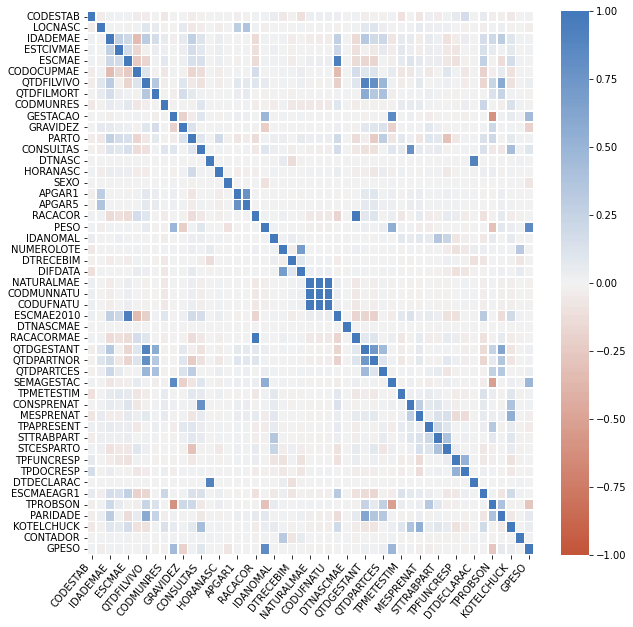

In [29]:
sinasc_df['PESO'] = sinasc_df['PESO'].astype('category').cat.codes

sinasc_corr = sinasc_df.corr()
corr_values = sinasc_corr['PESO'].sort_values(ascending=False)
corr_values = abs(corr_values).sort_values(ascending=False)

print('Correlação das features numéricas com o resultado em ordem crescente')
print(abs(corr_values).sort_values(ascending=False))

corr4 = sinasc_df.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr4,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 250, n=200),
    square=False,
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
);

In [30]:
sinasc_df = sinasc_df.drop(columns=['IDANOMAL', 'CONTADOR', 'CODMUNRES','RACACORMAE', 'RACACOR',
                                  'ESCMAE', 'ESTCIVMAE', 'DTDECLARAC', 'HORANASC',
                                  'NUMEROLOTE', 'ESCMAE2010', 'DTNASC','APGAR1', 'ESCMAEAGR1',
                                  'CODOCUPMAE', 'DIFDATA', 'STCESPARTO', 'TPFUNCRESP',
                                  'DTNASCMAE', 'DTRECEBIM', 'APGAR5'], axis=1)

### Análise de Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


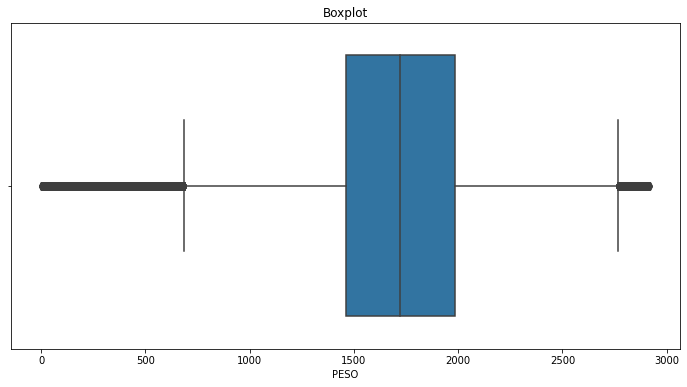

In [31]:
fig2, ax2 = plt.subplots(figsize=(12,6))
fig2 = sns.boxplot(sinasc_df.PESO).set_title('Boxplot')
fig2.figure.savefig('boxplot_origin.png')

In [32]:
def outliers(s):
    iqr = (np.quantile(s, 0.65))-(np.quantile(s, 0.45))
    upper_bound = np.quantile(s, 0.65)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.45)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(sinasc_df.PESO)

,sub,values
0,IQR,191.000000
1,Upper Bound,2156.500000
2,Lower Bound,1392.500000
3,Sum outliers,67618.000000
4,percentage outliers,32.510373


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


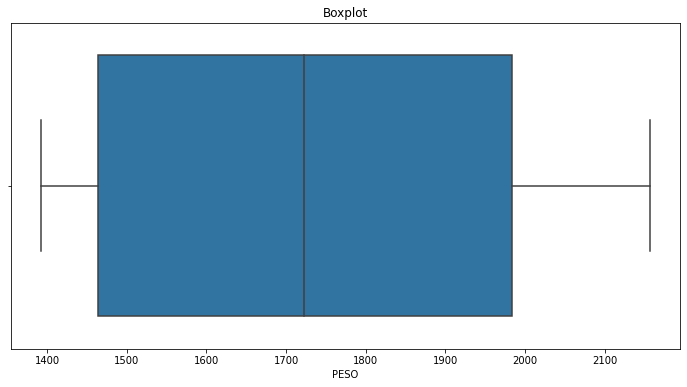

In [33]:
s = sinasc_df['PESO']
iqr = (np.quantile(s, 0.65))-(np.quantile(s, 0.45))
upper_bound = np.quantile(s, 0.65)+(1.5*iqr)
lower_bound = np.quantile(s, 0.45)-(1.5*iqr)

# limiting outliers
sinasc_df['PESO'] = np.where(sinasc_df['PESO'] > upper_bound, upper_bound,sinasc_df['PESO']) #higher
sinasc_df['PESO'] = np.where(sinasc_df['PESO'] < lower_bound, lower_bound,sinasc_df['PESO']) #lower

fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(sinasc_df.PESO).set_title('Boxplot')
fig.figure.savefig('AP_drop.png')

In [34]:
sinasc_df.shape

(207989, 29)

In [35]:
sinasc_df = pd.get_dummies(sinasc_df)
sinasc_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
CODESTAB,2365146.0,2727064.0,2561344.0,2473577.0,2654032.0,2707527.0,2336812.0,2757710.0,2703041.0,2344882.0
LOCNASC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
IDADEMAE,26.0,29.0,27.0,18.0,30.0,25.0,32.0,20.0,32.0,26.0
QTDFILVIVO,1.0,0.0,4.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0
QTDFILMORT,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
GESTACAO,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0
GRAVIDEZ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PARTO,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
CONSULTAS,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,3.0
SEXO,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0


In [36]:
sinasc_df = sinasc_df.drop('PESO', axis=1)

In [37]:
# recupera os valores (X), e as classes (Y)
X = sinasc_df.drop('GPESO', axis=1)
Y = sinasc_df['GPESO']
 
# dividir o dataset entre treino e teste
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=26)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1, stratify=Y)

In [38]:
# stochastic gradient descent (SGD)
sgd1 = linear_model.SGDClassifier(max_iter=5, tol=None)

sgd1.fit(X_train, Y_train)
Y_pred1 = sgd1.predict(X_test)

acc_sgd1 = round(sgd1.score(X_train, Y_train) * 100, 2)

print(round(acc_sgd1,2,), "%")
print(classification_report(Y_test, Y_pred1))
print(pd.crosstab(Y_test, Y_pred1, rownames=['Real'], colnames=['Predito'], margins=True))

29.12 %
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       789
           2       0.00      0.00      0.00      1369
           3       0.29      1.00      0.45     15141
           4       0.00      0.00      0.00     32117
           5       0.00      0.00      0.00      2582

    accuracy                           0.29     51998
   macro avg       0.06      0.20      0.09     51998
weighted avg       0.08      0.29      0.13     51998

Predito      3    All
Real                 
1          789    789
2         1369   1369
3        15141  15141
4        32117  32117
5         2582   2582
All      51998  51998


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# Gaussian Naive Bayes
gaussian1 = GaussianNB()

gaussian1.fit(X_train, Y_train)
Y_pred2 = gaussian1.predict(X_test)

acc_gaussian1 = round(gaussian1.score(X_train, Y_train) * 100, 2)

print(round(acc_gaussian1,2,), "%")
print(pd.crosstab(Y_test, Y_pred2, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred2))

61.24 %
Predito      4    5    All
Real                      
1          782    7    789
2         1352   17   1369
3        15025  116  15141
4        31844  273  32117
5         2554   28   2582
All      51557  441  51998
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       789
           2       0.00      0.00      0.00      1369
           3       0.00      0.00      0.00     15141
           4       0.62      0.99      0.76     32117
           5       0.06      0.01      0.02      2582

    accuracy                           0.61     51998
   macro avg       0.14      0.20      0.16     51998
weighted avg       0.38      0.61      0.47     51998



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# Perceptron
perceptron1 = Perceptron(max_iter=5)

perceptron1.fit(X_train, Y_train)
Y_pred3 = perceptron1.predict(X_test)

acc_perceptron1 = round(perceptron1.score(X_train, Y_train) * 100, 2)

print(round(acc_perceptron1,2,), "%")
print(pd.crosstab(Y_test, Y_pred3, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred3))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


61.77 %
Predito      4    All
Real                 
1          789    789
2         1369   1369
3        15141  15141
4        32117  32117
5         2582   2582
All      51998  51998
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       789
           2       0.00      0.00      0.00      1369
           3       0.00      0.00      0.00     15141
           4       0.62      1.00      0.76     32117
           5       0.00      0.00      0.00      2582

    accuracy                           0.62     51998
   macro avg       0.12      0.20      0.15     51998
weighted avg       0.38      0.62      0.47     51998



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# KNN
knn1 = KNeighborsClassifier(n_neighbors = 5)

knn1.fit(X_train, Y_train)
Y_pred4 = knn1.predict(X_test)

acc_knn1 = round(knn1.score(X_train, Y_train) * 100, 2)

print(round(acc_knn1,2,), "%")
print(pd.crosstab(Y_test, Y_pred4, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred4))

71.22 %
Predito    1    2      3      4    5    All
Real                                       
1        112  102    196    375    4    789
2         39  386    623    318    3   1369
3         31  248   4734  10101   27  15141
4         35   80   5974  25926  102  32117
5          2    4    384   2181   11   2582
All      219  820  11911  38901  147  51998
              precision    recall  f1-score   support

           1       0.51      0.14      0.22       789
           2       0.47      0.28      0.35      1369
           3       0.40      0.31      0.35     15141
           4       0.67      0.81      0.73     32117
           5       0.07      0.00      0.01      2582

    accuracy                           0.60     51998
   macro avg       0.42      0.31      0.33     51998
weighted avg       0.55      0.60      0.57     51998



In [42]:
# Logistic Regression
lr1 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

lr1.fit(X_train, Y_train)
Y_pred5 = lr1.predict(X_test)

acc_log1 = round(lr1.score(X_train, Y_train) * 100, 2)

print(round(acc_log1,2,), "%")
print(pd.crosstab(Y_test, Y_pred5, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred5))

61.77 %
Predito      4    All
Real                 
1          789    789
2         1369   1369
3        15141  15141
4        32117  32117
5         2582   2582
All      51998  51998
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       789
           2       0.00      0.00      0.00      1369
           3       0.00      0.00      0.00     15141
           4       0.62      1.00      0.76     32117
           5       0.00      0.00      0.00      2582

    accuracy                           0.62     51998
   macro avg       0.12      0.20      0.15     51998
weighted avg       0.38      0.62      0.47     51998



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# SVM
linear_svc1 = LinearSVC()

linear_svc1.fit(X_train, Y_train)
Y_pred6 = linear_svc1.predict(X_test)

acc_linear_svc1 = round(linear_svc1.score(X_train, Y_train) * 100, 2)

print(round(acc_linear_svc1,2,), "%")
print(pd.crosstab(Y_test, Y_pred6, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred6))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


61.77 %
Predito      4    All
Real                 
1          789    789
2         1369   1369
3        15141  15141
4        32117  32117
5         2582   2582
All      51998  51998
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       789
           2       0.00      0.00      0.00      1369
           3       0.00      0.00      0.00     15141
           4       0.62      1.00      0.76     32117
           5       0.00      0.00      0.00      2582

    accuracy                           0.62     51998
   macro avg       0.12      0.20      0.15     51998
weighted avg       0.38      0.62      0.47     51998



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# Decision Tree
decision_tree1 = DecisionTreeClassifier()

decision_tree1.fit(X_train, Y_train)
Y_pred7 = decision_tree1.predict(X_test)

acc_decision_tree1 = round(decision_tree1.score(X_train, Y_train) * 100, 2)

print(round(acc_decision_tree1,2,), "%")
print(pd.crosstab(Y_test, Y_pred7, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred7))

99.39 %
Predito    1     2      3      4     5    All
Real                                         
1        227    98    179    252    33    789
2        105   609    454    189    12   1369
3        196   464   6124   7777   580  15141
4        403   184   8446  21000  2084  32117
5         37    12    526   1716   291   2582
All      968  1367  15729  30934  3000  51998
              precision    recall  f1-score   support

           1       0.23      0.29      0.26       789
           2       0.45      0.44      0.45      1369
           3       0.39      0.40      0.40     15141
           4       0.68      0.65      0.67     32117
           5       0.10      0.11      0.10      2582

    accuracy                           0.54     51998
   macro avg       0.37      0.38      0.37     51998
weighted avg       0.55      0.54      0.55     51998



In [45]:
# Random Forest
random_forest1 = RandomForestClassifier(n_estimators=100)

random_forest1.fit(X_train, Y_train)
Y_pred8 = random_forest1.predict(X_test)

acc_random_forest1 = round(random_forest1.score(X_train, Y_train) * 100, 2)

print(round(acc_random_forest1,2,), "%")
print(pd.crosstab(Y_test, Y_pred8, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred8))

99.39 %
Predito    1     2     3      4    5    All
Real                                       
1        240    95   101    352    1    789
2         56   694   504    115    0   1369
3         29   228  5205   9645   34  15141
4         31    57  3691  28202  136  32117
5          3     3   150   2410   16   2582
All      359  1077  9651  40724  187  51998
              precision    recall  f1-score   support

           1       0.67      0.30      0.42       789
           2       0.64      0.51      0.57      1369
           3       0.54      0.34      0.42     15141
           4       0.69      0.88      0.77     32117
           5       0.09      0.01      0.01      2582

    accuracy                           0.66     51998
   macro avg       0.53      0.41      0.44     51998
weighted avg       0.62      0.66      0.62     51998



In [46]:
# Ranking final do percentual de acurácia dos modelos aplicados
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc1, acc_knn1, acc_log1, 
              acc_random_forest1, acc_gaussian1, acc_perceptron1, 
              acc_sgd1, acc_decision_tree1]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.39,Random Forest
99.39,Decision Tree
71.22,KNN
61.77,Support Vector Machines
61.77,Logistic Regression
61.77,Perceptron
61.24,Naive Bayes
29.12,Stochastic Gradient Decent


### Balanceamento

4    128467
3     60562
5     10327
2      5476
1      3157
Name: GPESO, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


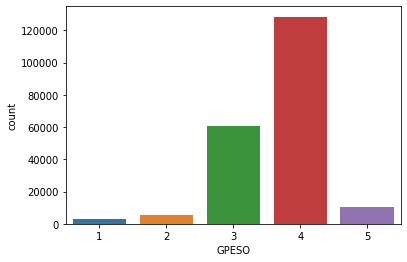

In [47]:
print(sinasc_df.GPESO.value_counts())
sns.countplot('GPESO', data=sinasc_df);

In [48]:
rus = RandomUnderSampler()

5    3157
4    3157
3    3157
2    3157
1    3157
Name: GPESO, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


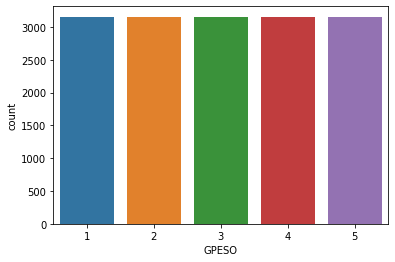

In [49]:
X_res, Y_res = rus.fit_resample(X, Y)
print(pd.Series(Y_res).value_counts())
sns.countplot(Y_res)

### SGD

In [50]:
# stochastic gradient descent (SGD)
sgd2 = linear_model.SGDClassifier(max_iter=5, tol=None)

sgd2.fit(X_res, Y_res)
Y_pred_1 = sgd2.predict(X_test)

#sgd.score(X_train, Y_train)
acc_sgd2 = round(sgd2.score(X_res, Y_res) * 100, 2)

print(round(acc_sgd2,2,), "%")
print(classification_report(Y_test, Y_pred_1))
print(pd.crosstab(Y_test, Y_pred_1, rownames=['Real'], colnames=['Predito'], margins=True))

20.25 %
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       789
           2       0.07      0.04      0.05      1369
           3       0.29      0.97      0.45     15141
           4       0.00      0.00      0.00     32117
           5       0.05      0.01      0.02      2582

    accuracy                           0.28     51998
   macro avg       0.08      0.20      0.10     51998
weighted avg       0.09      0.28      0.13     51998

Predito    2      3    5    All
Real                           
1         25    750   14    789
2         57   1286   26   1369
3        277  14647  217  15141
4        454  31208  455  32117
5         49   2497   36   2582
All      862  50388  748  51998


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes

In [51]:
# Gaussian Naive Bayes
gaussian2 = GaussianNB()

gaussian2.fit(X_res, Y_res)
Y_pred_2 = gaussian2.predict(X_test)

acc_gaussian2 = round(gaussian2.score(X_res, Y_res) * 100, 2)

print(round(acc_gaussian2,2,), "%")
print(pd.crosstab(Y_test, Y_pred_2, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred_2))

22.25 %
Predito      1    2     3      4     5    All
Real                                         
1          385   21    46    259    78    789
2          666   33    46    521   103   1369
3         6943  281   728   6012  1177  15141
4        14274  433  1523  13015  2872  32117
5         1098   28   102   1032   322   2582
All      23366  796  2445  20839  4552  51998
              precision    recall  f1-score   support

           1       0.02      0.49      0.03       789
           2       0.04      0.02      0.03      1369
           3       0.30      0.05      0.08     15141
           4       0.62      0.41      0.49     32117
           5       0.07      0.12      0.09      2582

    accuracy                           0.28     51998
   macro avg       0.21      0.22      0.15     51998
weighted avg       0.48      0.28      0.33     51998



### Perceptron

In [52]:
# Perceptron
perceptron2 = Perceptron(max_iter=5)

perceptron2.fit(X_res, Y_res)
Y_pred_3 = perceptron2.predict(X_test)

acc_perceptron2 = round(perceptron2.score(X_res, Y_res) * 100, 2)

print(round(acc_perceptron2,2,), "%")
print(pd.crosstab(Y_test, Y_pred_3, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred_3))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19.78 %
Predito      1     3    All
Real                       
1          750    39    789
2         1286    83   1369
3        14647   494  15141
4        31206   911  32117
5         2497    85   2582
All      50386  1612  51998
              precision    recall  f1-score   support

           1       0.01      0.95      0.03       789
           2       0.00      0.00      0.00      1369
           3       0.31      0.03      0.06     15141
           4       0.00      0.00      0.00     32117
           5       0.00      0.00      0.00      2582

    accuracy                           0.02     51998
   macro avg       0.06      0.20      0.02     51998
weighted avg       0.09      0.02      0.02     51998



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN Regressor

In [53]:
# KNN
knn2 = KNeighborsClassifier(n_neighbors = 5)

knn2.fit(X_res, Y_res)
Y_pred_4 = knn2.predict(X_test)

acc_knn2 = round(knn2.score(X_res, Y_res) * 100, 2)

print(round(acc_knn2,2,), "%")
print(pd.crosstab(Y_test, Y_pred_4, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred_4))

56.54 %
Predito     1     2      3      4     5    All
Real                                          
1         472   120     64     69    64    789
2         203   913    107     74    72   1369
3        2851  2447   4138   3450  2255  15141
4        5847  2308   7994   9372  6596  32117
5         394   166    479    661   882   2582
All      9767  5954  12782  13626  9869  51998
              precision    recall  f1-score   support

           1       0.05      0.60      0.09       789
           2       0.15      0.67      0.25      1369
           3       0.32      0.27      0.30     15141
           4       0.69      0.29      0.41     32117
           5       0.09      0.34      0.14      2582

    accuracy                           0.30     51998
   macro avg       0.26      0.43      0.24     51998
weighted avg       0.53      0.30      0.35     51998



### Logistic Regressor

In [54]:
# Logistic Regression
lr2 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

lr2.fit(X_res, Y_res)
Y_pred2 = lr2.predict(X_test)

acc_log2 = round(lr2.score(X_res, Y_res) * 100, 2)
print(round(acc_log2,2,), "%")
print(classification_report(Y_test, Y_pred2))
print(pd.crosstab(Y_test, Y_pred2, rownames=['Real'], colnames=['Predito'], margins=True))

21.05 %
              precision    recall  f1-score   support

           1       0.02      0.62      0.03       789
           2       0.00      0.00      0.00      1369
           3       0.31      0.01      0.01     15141
           4       0.62      0.41      0.49     32117
           5       0.00      0.00      0.00      2582

    accuracy                           0.27     51998
   macro avg       0.19      0.21      0.11     51998
weighted avg       0.47      0.27      0.31     51998

Predito      1    3      4    All
Real                             
1          493    6    290    789
2          814   12    543   1369
3         8905  112   6124  15141
4        18685  223  13209  32117
5         1478   14   1090   2582
All      30375  367  21256  51998


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [55]:
# SVM
linear_svc2 = LinearSVC()

linear_svc2.fit(X_res, Y_res)
Y_pred_6 = linear_svc2.predict(X_test)

acc_linear_svc2 = round(linear_svc2.score(X_res, Y_res) * 100, 2)

print(round(acc_linear_svc2,2,), "%")
print(pd.crosstab(Y_test, Y_pred_6, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred_6))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19.6 %
Predito      2      4    All
Real                        
1          287    502    789
2          538    831   1369
3         6006   9135  15141
4        12854  19263  32117
5         1058   1524   2582
All      20743  31255  51998
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       789
           2       0.03      0.39      0.05      1369
           3       0.00      0.00      0.00     15141
           4       0.62      0.60      0.61     32117
           5       0.00      0.00      0.00      2582

    accuracy                           0.38     51998
   macro avg       0.13      0.20      0.13     51998
weighted avg       0.38      0.38      0.38     51998



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [56]:
# Decision Tree
decision_tree2 = DecisionTreeClassifier()

decision_tree2.fit(X_res, Y_res)
Y_pred_7 = decision_tree2.predict(X_test)

acc_decision_tree2 = round(decision_tree2.score(X_res, Y_res) * 100, 2)

print(round(acc_decision_tree2,2,), "%")
print(pd.crosstab(Y_test, Y_pred_7, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred_7))

99.85 %
Predito     1     2      3      4      5    All
Real                                           
1         789     0      0      0      0    789
2         108  1147     77     21     16   1369
3        2367  1728   5290   3324   2432  15141
4        5131  1038   7322   9951   8675  32117
5         246    35    332    490   1479   2582
All      8641  3948  13021  13786  12602  51998
              precision    recall  f1-score   support

           1       0.09      1.00      0.17       789
           2       0.29      0.84      0.43      1369
           3       0.41      0.35      0.38     15141
           4       0.72      0.31      0.43     32117
           5       0.12      0.57      0.19      2582

    accuracy                           0.36     51998
   macro avg       0.33      0.61      0.32     51998
weighted avg       0.58      0.36      0.40     51998



### Randomm Forest

In [57]:
# Random Forest
random_forest2 = RandomForestClassifier(n_estimators=100)

random_forest2.fit(X_res, Y_res)
Y_pred_8 = random_forest2.predict(X_test)

#random_forest.score(X_train, Y_train)
acc_random_forest2 = round(random_forest2.score(X_res, Y_res) * 100, 2)

print(round(acc_random_forest2,2,), "%")
print(pd.crosstab(Y_test, Y_pred_8, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred_8))

99.85 %
Predito     1     2      3      4      5    All
Real                                           
1         787     2      0      0      0    789
2          54  1243     59      5      8   1369
3         903  1944   6342   3649   2303  15141
4        2003   683   7409  11525  10497  32117
5          85    18    214    471   1794   2582
All      3832  3890  14024  15650  14602  51998
              precision    recall  f1-score   support

           1       0.21      1.00      0.34       789
           2       0.32      0.91      0.47      1369
           3       0.45      0.42      0.43     15141
           4       0.74      0.36      0.48     32117
           5       0.12      0.69      0.21      2582

    accuracy                           0.42     51998
   macro avg       0.37      0.68      0.39     51998
weighted avg       0.60      0.42      0.45     51998



## Resultados

In [58]:
# Ranking final do percentual de acurácia dos modelos aplicados
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc2, acc_knn2, acc_log2, 
              acc_random_forest2, acc_gaussian2, acc_perceptron2, 
              acc_sgd2, acc_decision_tree2]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.85,Random Forest
99.85,Decision Tree
56.54,KNN
22.25,Naive Bayes
21.05,Logistic Regression
20.25,Stochastic Gradient Decent
19.78,Perceptron
19.60,Support Vector Machines
